In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import operator

In [5]:
#Returns dictionary: {'class': [('token', 'pos', 'chunk')]}
def read_data(path):
    output = {}
    
    with open(path) as file:
        for line in file:
            if line[0] == '\n':
                continue
            if line[:3] == '-DO':
                continue
        
            line_splitted = line.split(' ')
            token = line_splitted[0]
            pos = line_splitted[1]
            chunk = line_splitted[2]
            cls = line_splitted[3][:-1]

            if cls not in output:
                output[cls] = []
            output[cls].append((token, pos, chunk))
    
    return output

#Returns dictionary: {'class': number}
def number_in_classes(dictionary):
    output = {}
    
    for key in dictionary:
        output[key] = len(dictionary[key])
    
    return output

def get_last_n_characters(token, n):
    return token[-n:]

#Returns dictionary: {"class": {"pos": number}}
def get_pos_count_per_class(dictionary):
    out, distinct = {}, []
    for key in dictionary:
        if key not in out:
            out[key] = {}
        for e in dictionary[key]:
            if e[1] not in out[key]:
                out[key][e[1]] = 0
            out[key][e[1]] += 1
        distinct += list(out[key].keys())
    distinct = list(set(distinct))
    for key in out:
        for pos in distinct:
            if pos not in out[key]:
                out[key][pos] = 0
    return out

#Returns dictionary: {"class": {"ltc": number}}
def get_last_characters_count(dictionary, n):
    output = {}
    
    for cls in dictionary:
        output[cls] = {}
    
    for cls in dictionary:
        for tpl in dictionary[cls]:
            token = tpl[0]
            ltc = get_last_n_characters(token, n)
            
            for cls2 in dictionary:
                if ltc not in output[cls2]:
                    output[cls2][ltc] = 0
            
            output[cls][ltc] += 1
    
    return output

#Returns dictionary: {"class": {"ltc": number}}
def get_n_most_frequent_ltc_per_class(dictionary, n, number_of_characters):
    counts = get_last_characters_count(dictionary, number_of_characters)
    
    output = {}
    
    for cls in counts:
        output[cls] = {}
    
    for cls in counts:
        sorted_list = sorted(counts[cls].items(), key = operator.itemgetter(1), reverse=1)[:n]
        for tpl in sorted_list:
            output[cls][tpl[0]] = tpl[1]
            
            for cls2 in dictionary:
                if tpl[0] not in output[cls2]:
                    output[cls2][tpl[0]] = 0
    
    return output

def get_n_most_frequent_chunks_per_class(dictionary, n):
    output = {}
    
    for cls in dictionary:
        output[cls] = {}
        
    for cls in dictionary:
        for tpl in dictionary[cls]:
            chunk = tpl[2]
            
            for cls2 in dictionary:
                if chunk not in output[cls2]:
                    output[cls2][chunk] = 0
            
            output[cls][chunk] += 1
        sorted_list = sorted(output[cls].items(), key = operator.itemgetter(1), reverse=1)[:n]
    
    for cls in dictionary:
        for chunk in output[cls]:
            for cls2 in dictionary:
                if chunk not in output[cls2]:
                    output[cls2] = 0
    
    counter = {}
    for cls in output:
        for chunk in output[cls]:
            if chunk not in counter:
                counter[chunk] = 0
            counter[chunk] += output[cls][chunk]
    
    for cls in output:
        for chunk in output[cls]:
            output[cls][chunk] /= counter[chunk]
    
    return output

def split_data(lst_of_tpl):
    x = [key for (key, value) in lst_of_tpl]
    y = [value for (key, value) in lst_of_tpl]
    
    return x, y

In [3]:
data = read_data("src/main/resources/data/en/ner_eng.train")

# Pos Tag Per Class

In [69]:
pos_df = pd.DataFrame(get_pos_count_per_class(data))
#convert and normalize
tmp = pos_df.T.to_dict()
for pos in tmp:
    total = 0
    for c in tmp[pos]:
        total += tmp[pos][c]
    for c in tmp[pos]:
        tmp[pos][c] /= total
pos_df = pd.DataFrame(tmp)
pos_df.T

,B-LOC,B-MISC,B-ORG,I-LOC,I-MISC,I-ORG,I-PER,O
"""",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
$,0.000000,0.000000,0.000000,0.000000,0.152225,0.000000,0.000000,0.847775
'',0.000000,0.000000,0.000000,0.000000,0.057143,0.000000,0.000000,0.942857
(,0.000000,0.000000,0.000000,0.000698,0.000000,0.003838,0.000698,0.994766
),0.000000,0.000000,0.000000,0.000698,0.000000,0.003838,0.000698,0.994766
",",0.000000,0.000000,0.000000,0.000137,0.000137,0.001783,0.000000,0.997943
.,0.000000,0.000000,0.000000,0.000541,0.000406,0.000812,0.000000,0.998241
:,0.000000,0.000000,0.000000,0.000000,0.001676,0.000000,0.000000,0.998324
CC,0.000000,0.000000,0.000000,0.000821,0.000274,0.018889,0.000000,0.980016
CD,0.000000,0.000051,0.000000,0.000152,0.003806,0.001218,0.000254,0.994519


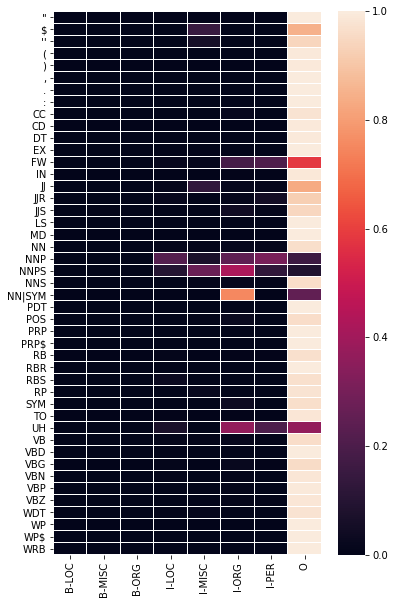

In [56]:
plt.subplots(nrows=1, ncols=1, figsize=(6, 10))
sns.heatmap(pos_df.T, linewidths=0.01)

NN|SYM -> I-ORG <br>
UH -> I-ORG, I-PER <br>
NNPS -> I-MISC, I-ORG <br>
NNP -> I-LOC, I-ORG, I-PER <br>

# Pos Tag per Class without O

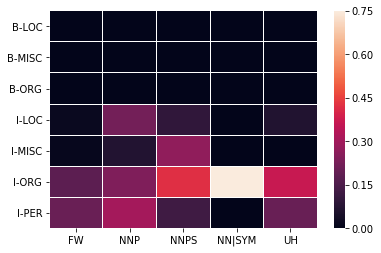

In [20]:
pos_df = pd.DataFrame(get_pos_count_per_class(data))
#convert and normalize
tmp = pos_df.T.to_dict()
for pos in tmp:
    total = 0
    for c in tmp[pos]:
        #if c != "O":
        total += tmp[pos][c]
    if total < 1:
        total = 1
    for c in tmp[pos]:
        tmp[pos][c] /= total
pos_df = pd.DataFrame(tmp)
cols = pos_df.T.columns[:-1]
cols2 = ["FW", "NNP", "NNPS", "NN|SYM", "UH"]
pos_df = pos_df[cols2]
pos_df = pos_df.T[cols]

#plt.subplots(nrows=1, ncols=1, figsize=(6, 10))
sns.heatmap(pos_df.T, linewidths=0.01)
plt.savefig('pos_per_class.png')

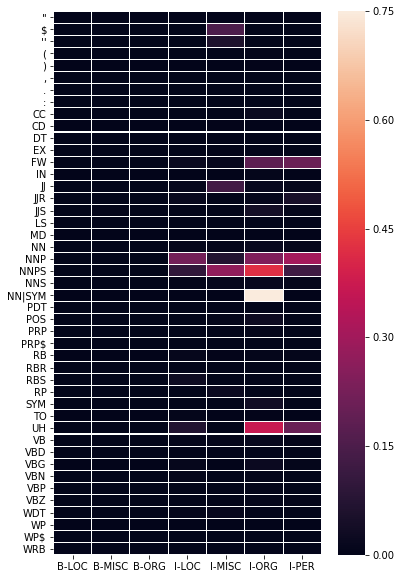

In [68]:
plt.subplots(nrows=1, ncols=1, figsize=(6, 10))
sns.heatmap(pos_df.T[cols], linewidths=0.01)

# Last two Characters

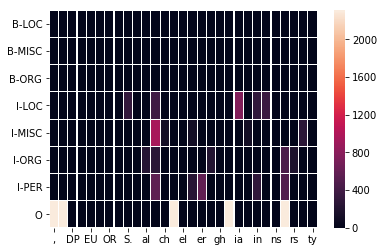

In [18]:
counts = get_n_most_frequent_ltc_per_class(data, 5, 2)

df = pd.DataFrame(counts)
sns.heatmap(df.T, robust = 1, linewidth = 0.1)
plt.show()

# Chunks

Index(['B-ADJP', 'B-ADVP', 'B-NP', 'B-PP', 'B-SBAR', 'B-VP', 'I-ADJP',
       'I-ADVP', 'I-CONJP', 'I-INTJ', 'I-LST', 'I-NP', 'I-PP', 'I-PRT',
       'I-SBAR', 'I-VP', 'O'],
      dtype='object')


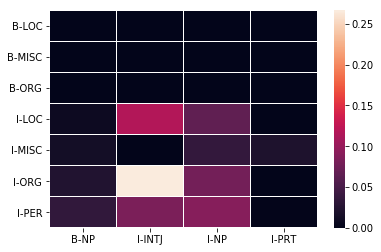

In [41]:
counts = get_n_most_frequent_chunks_per_class(data, 5)

df = pd.DataFrame(counts)
cols = df.columns[:-1]
df = df[cols]
print(df.T.columns)
df = df.T[['B-NP', 'I-INTJ', 'I-NP', 'I-PRT']]
sns.heatmap(df, linewidth = 0.1)
plt.savefig('chunks_per_class.png')
plt.show()